In [1]:
#from ERIKA import what SHE HAS 
#from visualstoryteller.getwords import getwords
from visualstoryteller.mixpictures import ImageStyle

In [2]:
ist = ImageStyle()

In [3]:
cont = 'https://qph.fs.quoracdn.net/main-qimg-a23a232d325357ad4151081926bc675a-c'
style = 'https://i.ytimg.com/vi/mt3bT6GN6Ks/maxresdefault.jpg'
ist.load_images(cont,style)

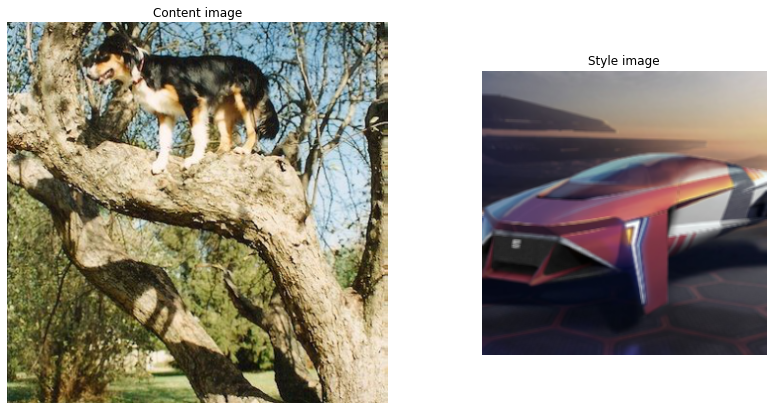

In [4]:
ist.show_originals()

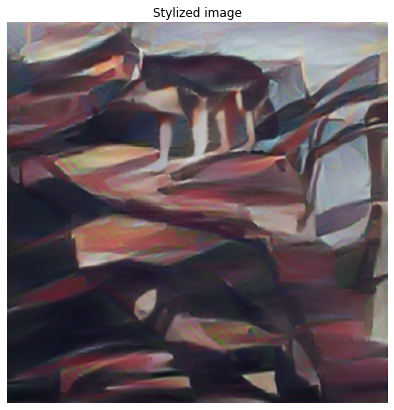

In [6]:
ist.show_stylized_image()

In [145]:
ist.s

<tf.Tensor: shape=(1, 384, 384, 3), dtype=float32, numpy=
array([[[[0.59094626, 0.5856979 , 0.66367227],
         [0.60454506, 0.5894319 , 0.6746658 ],
         [0.6019076 , 0.5911893 , 0.6767791 ],
         ...,
         [0.72079015, 0.7680383 , 0.74901515],
         [0.73761964, 0.8001678 , 0.7666229 ],
         [0.77972007, 0.81667435, 0.7797631 ]],

        [[0.58698595, 0.57913464, 0.65194744],
         [0.60129154, 0.58434415, 0.66079164],
         [0.5891534 , 0.581604  , 0.6553028 ],
         ...,
         [0.71911526, 0.7629008 , 0.74886084],
         [0.74393386, 0.7993244 , 0.7669673 ],
         [0.79093975, 0.82050276, 0.78464484]],

        [[0.57131547, 0.5804001 , 0.6308543 ],
         [0.58504546, 0.5859368 , 0.6379242 ],
         [0.5797645 , 0.586996  , 0.63885385],
         ...,
         [0.6584849 , 0.72044647, 0.693098  ],
         [0.67771274, 0.75021607, 0.71162045],
         [0.72287524, 0.7693449 , 0.72372776]],

        ...,

        [[0.06133121, 0.07472253, 

In [102]:
x

NameError: name 'x' is not defined